In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  
tf.reset_default_graph()
import tensorflow as tf
(features,actual_prices),_=tf.keras.datasets.boston_housing.load_data(test_split=0)

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x=tf.compat.v1.placeholder(shape=[None,13],dtype=tf.float32,name='x-input')

In [3]:
y_=tf.compat.v1.placeholder(shape=[None],dtype=tf.float32,name='y-actual')

In [4]:
print(x,y_)
x_n=tf.math.l2_normalize(
    x, axis=None, epsilon=1e-12, name=None, dim=None
)

Tensor("x-input:0", shape=(?, 13), dtype=float32) Tensor("y-actual:0", shape=(?,), dtype=float32)
Instructions for updating:
dim is deprecated, use axis instead


In [5]:
W=tf.compat.v1.Variable(tf.zeros(shape=[13,1]),name='Weights')
print(W)
b=tf.compat.v1.Variable(tf.zeros(shape=[1]),name='Bias')

<tf.Variable 'Weights:0' shape=(13, 1) dtype=float32_ref>


In [6]:
y=tf.add(tf.matmul(x_n,W),b,'OUTPUT')

In [7]:
loss=tf.reduce_mean(tf.square(y-y_),name='LOSS')

In [8]:
train_op=tf.compat.v1.train.GradientDescentOptimizer(0.11).minimize(loss)
#wi= wiold-+ nu*wi

In [9]:
sess=tf.compat.v1.Session()

In [10]:
sess.run(tf.compat.v1.global_variables_initializer())

In [11]:
iterations=1188



In [12]:
 
for i in range(iterations):
    _,train_loss=sess.run([train_op,loss],feed_dict={x:features,y_:actual_prices})
    if i%100==0:
        print('Training loss at step:',i,'is',train_loss)

Training loss at step: 0 is 592.1469
Training loss at step: 100 is 84.41963
Training loss at step: 200 is 84.41963
Training loss at step: 300 is 84.41963
Training loss at step: 400 is 84.41963
Training loss at step: 500 is 84.419624
Training loss at step: 600 is 84.419624
Training loss at step: 700 is 84.419624
Training loss at step: 800 is 84.419624
Training loss at step: 900 is 84.41961
Training loss at step: 1000 is 84.419624
Training loss at step: 1100 is 84.41961


In [13]:
features[0:1]


array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]])

In [14]:
from keras.models import Sequential
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=(13,)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='sgd',loss='mse')
model.fit(features,actual_prices,epochs=108)


Instructions for updating:
Colocations handled automatically by placer.
Train on 506 samples
Epoch 1/108
506/506 [==============================] - 1s 2ms/sample - loss: 169.9219
Epoch 2/108
506/506 [==============================] - 0s 152us/sample - loss: 41.0943
Epoch 3/108
506/506 [==============================] - 0s 113us/sample - loss: 40.9073
Epoch 4/108
506/506 [==============================] - 0s 103us/sample - loss: 32.2826
Epoch 5/108
506/506 [==============================] - 0s 91us/sample - loss: 35.5279
Epoch 6/108
506/506 [==============================] - 0s 91us/sample - loss: 32.1548
Epoch 7/108
506/506 [==============================] - 0s 55us/sample - loss: 30.1154
Epoch 8/108
506/506 [==============================] - 0s 57us/sample - loss: 32.3437
Epoch 9/108
506/506 [==============================] - 0s 59us/sample - loss: 28.4485
Epoch 10/108
506/506 [==============================] - 0s 49us/sample - loss: 28.5900
Epoch 11/108
506/506 [=====================

In [16]:
model.save('models/boston_housing.h5')
sess.close()

In [17]:
pip install hspy conda

Note: you may need to restart the kernel to use updated packages.


In [18]:
modelx=tf.keras.models.load_model('models/boston_housing.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
inputdata=[1.23,0,8.14,0,0.54,6.14,91.7,3.98,4,307,21,396.9,18.72]

In [20]:
import numpy as np 
inputdata=np.reshape(inputdata,(1,13))

In [21]:
predicted_output=modelx.predict(inputdata)
print(predicted_output[0][0])

C:\ANACONDA\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


16.316624


In [25]:
import tensorflow as tf 
tf.compat.v1.set_random_seed(42)

In [7]:
(Trainx,Trainy),(TestX,TestY)=tf.keras.datasets.mnist.load_data()

In [8]:
Trainy=tf.keras.utils.to_categorical(Trainy,num_classes=10)
TestY=tf.keras.utils.to_categorical(TestY,num_classes=10)

# USING NORMAL LOGISTIC REGRESSION


In [5]:
import tensorflow as tf
from keras.models import Sequential
modelclass=tf.keras.models.Sequential()
modelclass.add(tf.keras.layers.Reshape((784,),input_shape=(28,28)))
modelclass.add(tf.keras.layers.BatchNormalization())
modelclass.add(tf.keras.layers.Dense(10,activation='softmax'))
modelclass.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
modelclass.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


In [9]:
modelclass.fit(Trainx,Trainy,validation_data=(TestX,TestY), epochs=20, batch_size=108)

Epoch 1/20
556/556 [==============================] - 2s 3ms/step - loss: 0.6559 - accuracy: 0.8081 - val_loss: 0.4806 - val_accuracy: 0.8809
Epoch 2/20
556/556 [==============================] - 2s 4ms/step - loss: 0.3959 - accuracy: 0.8868 - val_loss: 0.4186 - val_accuracy: 0.8964
Epoch 3/20
556/556 [==============================] - 2s 3ms/step - loss: 0.3580 - accuracy: 0.8966 - val_loss: 0.4130 - val_accuracy: 0.9039
Epoch 4/20
556/556 [==============================] - 2s 3ms/step - loss: 0.3383 - accuracy: 0.9025 - val_loss: 0.3925 - val_accuracy: 0.9065
Epoch 5/20
556/556 [==============================] - 2s 3ms/step - loss: 0.3274 - accuracy: 0.9064 - val_loss: 0.3639 - val_accuracy: 0.9097
Epoch 6/20
556/556 [==============================] - 2s 3ms/step - loss: 0.3168 - accuracy: 0.9095 - val_loss: 0.3592 - val_accuracy: 0.9128
Epoch 7/20
556/556 [==============================] - 2s 3ms/step - loss: 0.3107 - accuracy: 0.9115 - val_loss: 0.3567 - val_accuracy: 0.9134
Epoch 



# USING DL mix not sigmoid but relu sigmoid is in other notebook


In [51]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


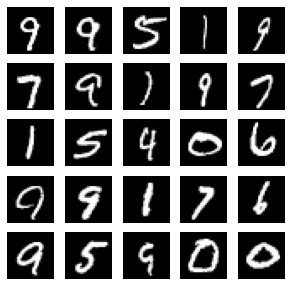

In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [55]:
num_labels = len(np.unique(y_train))

In [56]:
print(num_labels)

10


In [57]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [58]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [59]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [60]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [61]:
modelclassf = Sequential()
modelclassf.add(Dense(hidden_units, input_dim=input_size))
modelclassf.add(Activation('relu'))
modelclassf.add(Dropout(dropout))
modelclassf.add(Dense(hidden_units))
modelclassf.add(Activation('relu'))
modelclassf.add(Dropout(dropout))
modelclassf.add(Dense(num_labels))
modelclassf.add(Activation('softmax'))

In [62]:
modelclassf.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 10)              

In [65]:
modelclassf.compile(loss='categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

In [66]:
modelclassf.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/sample - loss: 1.6196 - acc: 0.4780
Epoch 2/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.8355 - acc: 0.7407
Epoch 3/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.6365 - acc: 0.8056
Epoch 4/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5454 - acc: 0.8353
Epoch 5/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4887 - acc: 0.8531
Epoch 6/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4488 - acc: 0.8662
Epoch 7/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4154 - acc: 0.8760
Epoch 8/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3941 - acc: 0.8824
Epoch 9/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3724 - acc: 0.8895
Epoch 10/20
60000/60000 [==============================] - 

In [78]:
prediction=modelclassf.predict(x_test[0:1])
predicted_num=np.argmax(prediction)
print("THE PREDICTED NO IS:",predicted_num)

THE PREDICTED NO IS: 7


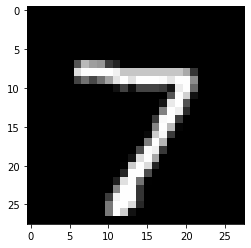

In [83]:
plt.imshow(TestX[0],cmap='gray')

In [88]:
loss, acc = modelclassf.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 94.9%


SyntaxError: invalid syntax (Temp/ipykernel_8012/3432714634.py, line 1)